# Start

In [6]:
!ls

MT5-Pytorch.py	   MT5-gradio-app.ipynb  README.md     report_TF.sqlite
MT5-TensorFlow.py  MT5-model-run.ipynb	 model_output


In [10]:
import sqlite3
import pandas as pd

In [7]:


#Importing files

# Replace 'my_database.sqlite' with the path to your SQLite database file
conn = sqlite3.connect('report_TF.sqlite')


In [8]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())


[('StringIds',), ('ProcessStreams',), ('TARGET_INFO_SYSTEM_ENV',), ('TARGET_INFO_SESSION_START_TIME',), ('ANALYSIS_DETAILS',), ('PROCESSES',), ('PROFILER_OVERHEAD',), ('CUPTI_ACTIVITY_KIND_RUNTIME',), ('CUPTI_ACTIVITY_KIND_SYNCHRONIZATION',), ('CUPTI_ACTIVITY_KIND_MEMCPY',), ('CUPTI_ACTIVITY_KIND_MEMSET',), ('CUPTI_ACTIVITY_KIND_KERNEL',), ('ThreadNames',), ('TARGET_INFO_GPU',), ('TARGET_INFO_CUDA_NULL_STREAM',), ('TARGET_INFO_CUDA_STREAM',), ('EXPORT_META_DATA',)]


In [16]:
query = "SELECT * FROM CUPTI_ACTIVITY_KIND_KERNEL;"
df = pd.read_sql_query(query, conn)
df


,start,end,deviceId,contextId,streamId,correlationId,globalPid,demangledName,shortName,mangledName,...,blockY,blockZ,staticSharedMemory,dynamicSharedMemory,localMemoryPerThread,localMemoryTotal,gridId,sharedMemoryExecuted,graphNodeId,sharedMemoryLimitConfig
0,46046270794,46058206167,0,1,13,934,281477610733568,73,74,48,...,1,1,0,0,0,90832896,1,8192,None,0
1,46079868607,46082871832,0,1,13,938,281477610733568,49,49,49,...,1,1,0,0,0,74317824,2,8192,None,0
2,46108824789,46111826829,0,1,13,942,281477610733568,50,50,50,...,1,1,0,0,0,74317824,3,8192,None,0
3,46113792515,46113795875,0,1,13,977,281477610733568,79,80,51,...,1,1,0,0,0,74317824,4,16384,None,0
4,46142461220,46142464099,0,1,13,995,281477610733568,52,52,52,...,1,1,0,0,0,74317824,5,8192,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165723,83326817303,83326819574,0,1,13,1141062,281477610733568,150,150,150,...,1,1,0,0,0,74317824,166307,8192,None,0
165724,83327384513,83327386720,0,1,13,1141076,281477610733568,237,120,235,...,1,1,0,0,0,74317824,166308,16384,None,0
165725,83327569157,83327572004,0,1,13,1141083,281477610733568,94,94,94,...,1,1,0,0,0,74317824,166309,8192,None,0
165726,83327709711,83327712015,0,1,13,1141090,281477610733568,167,167,167,...,1,1,0,0,0,74317824,166310,8192,None,0


In [12]:
df.columns

Index(['start', 'end', 'deviceId', 'contextId', 'streamId', 'correlationId',
       'globalPid', 'demangledName', 'shortName', 'mangledName', 'launchType',
       'cacheConfig', 'registersPerThread', 'gridX', 'gridY', 'gridZ',
       'blockX', 'blockY', 'blockZ', 'staticSharedMemory',
       'dynamicSharedMemory', 'localMemoryPerThread', 'localMemoryTotal',
       'gridId', 'sharedMemoryExecuted', 'graphNodeId',
       'sharedMemoryLimitConfig'],
      dtype='object')

In [14]:
query = """
SELECT demangledName, 
       sum(staticSharedMemory) as totalStaticSharedMemory, 
       sum(dynamicSharedMemory) as totalDynamicSharedMemory, 
       avg(localMemoryPerThread) as avgLocalMemoryPerThread, 
       sum(localMemoryTotal) as totalLocalMemory 
FROM CUPTI_ACTIVITY_KIND_KERNEL 
GROUP BY demangledName;
"""
df = pd.read_sql_query(query, conn)
df


,demangledName,totalStaticSharedMemory,totalDynamicSharedMemory,avgLocalMemoryPerThread,totalLocalMemory
0,49,0,0,0.0,2119098433536
1,50,0,0,0.0,2274571321344
2,52,0,0,0.0,37902090240
3,53,0,0,0.0,15160836096
4,55,0,0,0.0,557086408704
...,...,...,...,...,...
76,225,0,0,0.0,7134511104
77,228,0,0,0.0,7134511104
78,231,7520,0,0.0,6985875456
79,237,0,0,0.0,148635648


In [19]:
from matplotlib import pyplot as plt

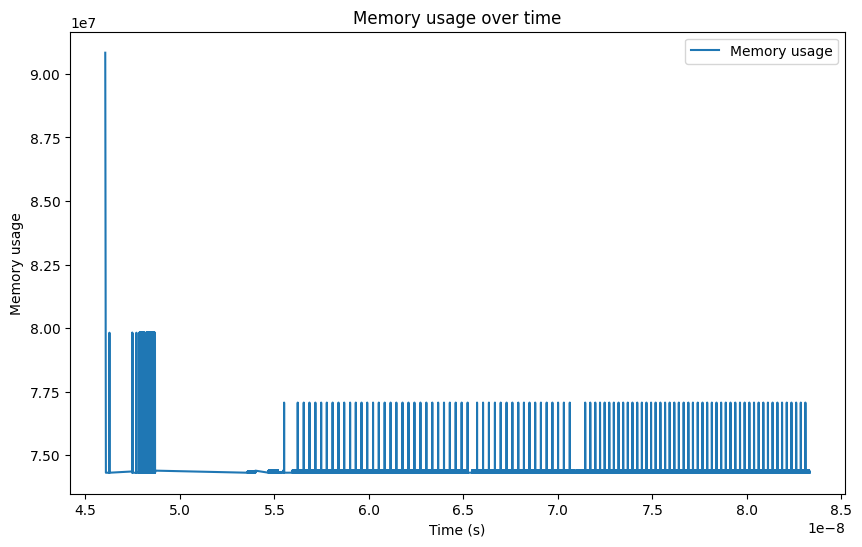

In [20]:

# Calculate the total memory usage
df["total_memory"] = df["staticSharedMemory"] + df["dynamicSharedMemory"] + df["localMemoryTotal"]

# Convert start and end times from nanoseconds to seconds for a more understandable scale
df["start"] = df["start"] / 1e9
df["end"] = df["end"] / 1e9

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(df["start"], df["total_memory"], label='Memory usage')
plt.xlabel('Time (s)')
plt.ylabel('Memory usage')
plt.title('Memory usage over time')
plt.legend()
plt.show()

In [ ]:
def format_number(number, unit):
    # Check for large values and apply appropriate units
    if unit == 'time':
        number /= 60  # Convert seconds to minutes
        if number >= 60:
            formatted_number = f"{number/60:.2f} hours"
        else:
            formatted_number = f"{number:.2f} minutes"
    elif unit == 'memory':
        number /= 1e9  # Convert bytes to gigabytes
        formatted_number = f"{number:.2f} GB"
    else:
        formatted_number = f"{number:.2f}"

    # Add comma separators for better readability
    formatted_number = f"{formatted_number:,}"

    return formatted_number

# Convert the statistics to human-readable format
pytorch_stats_formatted = (format_number(pytorch_stats[0], 'time'),
                           format_number(pytorch_stats[1], ''),
                           format_number(pytorch_stats[2], 'memory'))
tensorflow_stats_formatted = (format_number(tensorflow_stats[0], 'time'),
                              format_number(tensorflow_stats[1], ''),
                              format_number(tensorflow_stats[2], 'memory'))

In [21]:
#Compute some initial statistics over each of the files

import sqlite3
import pandas as pd

# Function to load and process the SQLite file
def load_and_process_sqlite_file(filename):
    conn = sqlite3.connect(filename)
    df = pd.read_sql_query("SELECT * from CUPTI_ACTIVITY_KIND_KERNEL", conn)

    # Compute the total execution time of all kernels
    total_execution_time = df['end'].sum() - df['start'].sum()

    # Compute the number of kernels
    number_of_kernels = len(df)

    # Compute the average memory usage per kernel
    avg_memory_usage = (df['staticSharedMemory'] + df['dynamicSharedMemory'] + df['localMemoryTotal']).mean()

    return total_execution_time, number_of_kernels, avg_memory_usage

# Load and process the SQLite files
pytorch_stats = load_and_process_sqlite_file('report_Pytorch.sqlite')
tensorflow_stats = load_and_process_sqlite_file('report_TF.sqlite')

print("PyTorch stats:", pytorch_stats)
print("TensorFlow stats:", tensorflow_stats)


PyTorch stats: (1832366652, 78964, 121113945.73552506)
TensorFlow stats: (2369184291, 165728, 74346331.59200618)


In [23]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 58.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.5/471.5 kB 66.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.6/138.6 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB

# Running gradio app

In [25]:
!pip install -U typing_extensions

In [1]:
pip install -U pydantic

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sqlite3
import pandas as pd
import gradio as gr

In [4]:
import sqlite3
import pandas as pd
import gradio as gr

# Function to load and process the SQLite file
def load_and_process_sqlite_file(filename):
    conn = sqlite3.connect(filename)
    df = pd.read_sql_query("SELECT * from CUPTI_ACTIVITY_KIND_KERNEL", conn)
    # Compute statistics here...
    total_execution_time = df['end'].sum() - df['start'].sum()
    number_of_kernels = len(df)
    avg_memory_usage = (df['staticSharedMemory'] + df['dynamicSharedMemory'] + df['localMemoryTotal']).mean()
    return total_execution_time, number_of_kernels, avg_memory_usage

# Load and process the SQLite files
pytorch_stats = load_and_process_sqlite_file('report_Pytorch.sqlite')
tensorflow_stats = load_and_process_sqlite_file('report_TF.sqlite')

# Function for the Gradio interface
def compare_kernels(method):
    if method == 'PyTorch':
        return pytorch_stats
    else:
        return tensorflow_stats
    
# Define the title for the Gradio interface
title = "Kernel Comparison App"

iface = gr.Interface(fn=compare_kernels, inputs='dropdown', outputs='text')
iface.launch(share = True)


Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://8d35b100de8e691787.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
